In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from IPython.display import clear_output
from src import spotify, dp, utils, DB

db = DB()

In [5]:
# 1. Get Token
token = spotify.get_token()

# 2. Select Music
sel_tracks = spotify.search_tracks(token)
mail_box_id = str(db.regist_mail_box(sel_tracks).inserted_id)

# 3. Data Processing
genres = spotify.get_genres(token, sel_tracks)
features = spotify.get_features(token, sel_tracks)
db.observe_seed_zone(features)

recos = spotify.get_recommend(sel_tracks, features, genres, token)
reco_features = spotify.get_features(token, recos)

계속하시려면 next, 종료는 exit를 입력해주세요.exit


### sel tracks (우체통)
- 사용자의 음악 성향

In [6]:
sel_tracks.head()

,id,name,artists,artists_name
0,7zDu3l7DDlfSlt20YMKkWo,Martini Blue,0siBQaURCli5wn2lqv8WZg,DPR LIVE
1,4LkXtklCusSbi6UxYWgH8B,Scaredy Cat,2o8gT0fQmFxGNbowbdgeZe,DPR IAN
2,2PcJoVkfjcbvoqBxV1Nj7y,All I Wanna Do,4XDi67ZENZcbfKnvMnTYsI,Jay Park


In [7]:
features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7zDu3l7DDlfSlt20YMKkWo,0.767,0.551,11,-6.654,0.1180,0.395,0,0.1300,0.881,139.937
1,4LkXtklCusSbi6UxYWgH8B,0.801,0.686,5,-4.252,0.0414,0.133,0,0.0882,0.885,120.007
2,2PcJoVkfjcbvoqBxV1Nj7y,0.613,0.668,8,-6.867,0.2670,0.245,0,0.0735,0.509,96.176


### recos
- 사용자가 등록한 음악으로 Spotify API 에서 추천된 음악

In [8]:
recos.head()

,id,name,artists,artists_name
1,1zIvvyjousJTxkumkCDnlo,BOLO,1MAUqH0haKBYbjpknTfreY,PENOMECO
2,1a1LrfgkTvfHFykIxcv8WU,Cherry Wine,73BLwSX6gsNeVzS7DgI4xe,grentperez
3,0apCIaqGTn0zJ2Xiwh8Ftg,Remember (feat. Ty Dolla $ign),2nDC4PH8XE1gHeeAxVLXRO,KATIE
4,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,4O15NlyKLIASxsJ0PrXPfz,Lil Uzi Vert
5,6nSHtgTH5a959xPucs6Ilb,HANGANG,7lXgbtBDcCRbfc5f8FhGUL,Hoody


In [9]:
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1zIvvyjousJTxkumkCDnlo,0.740,0.669,11,-5.702,0.0760,0.36100,0.000022,0.1750,0.922,103.025
1,1a1LrfgkTvfHFykIxcv8WU,0.761,0.565,11,-7.016,0.0411,0.34500,0.000000,0.0825,0.583,105.008
2,0apCIaqGTn0zJ2Xiwh8Ftg,0.442,0.640,11,-5.680,0.0488,0.37300,0.000000,0.0827,0.479,130.537
3,7GX5flRQZVHRAGd6B4TmDO,0.732,0.750,11,-6.366,0.2310,0.00264,0.000000,0.1090,0.401,155.096
4,6nSHtgTH5a959xPucs6Ilb,0.685,0.559,11,-6.004,0.0548,0.19600,0.000000,0.1650,0.770,109.151


### norm data
- 정규화

In [10]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7zDu3l7DDlfSlt20YMKkWo,0.709302,0.447476,1.000000,0.562195,0.190871,0.472310,0.000000,0.125032,0.882423,0.656004
1,4LkXtklCusSbi6UxYWgH8B,0.758721,0.631651,0.454545,0.796354,0.031950,0.158807,0.000000,0.071483,0.887173,0.454568
2,2PcJoVkfjcbvoqBxV1Nj7y,0.485465,0.607094,0.727273,0.541431,0.500000,0.292824,0.000000,0.052652,0.440618,0.213705
3,1zIvvyjousJTxkumkCDnlo,0.670058,0.608458,1.000000,0.655001,0.103734,0.431626,0.000139,0.182680,0.931116,0.282929
4,1a1LrfgkTvfHFykIxcv8WU,0.700581,0.466576,1.000000,0.526906,0.031328,0.412481,0.000000,0.064181,0.528504,0.302971


### 추천된 데이터들의 audio features 시각화

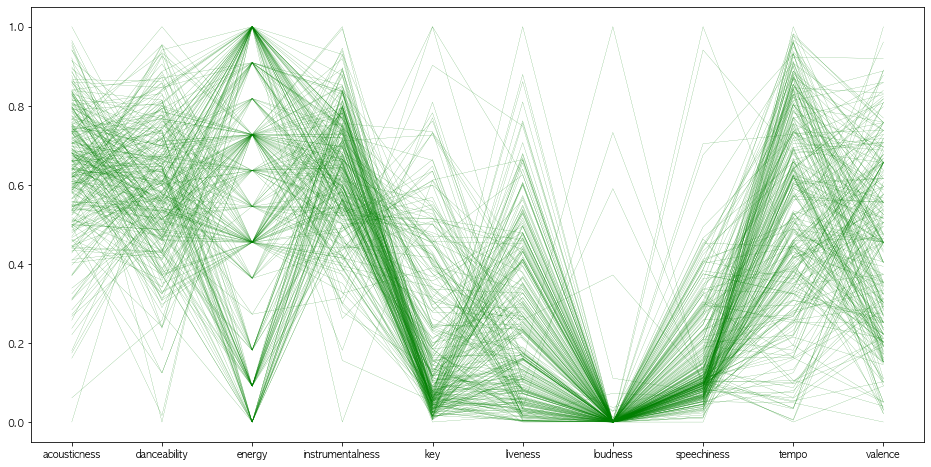

In [11]:
utils.visual_norm_data(sel_tracks, norm_features)

### KMeans

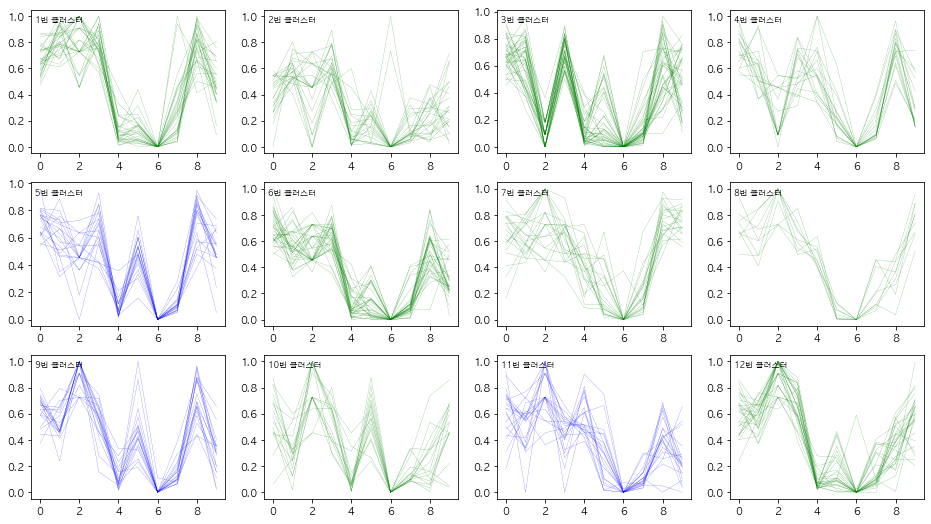

In [13]:
filter_music_list, kmeans = utils.reco_KMeans(norm_features, sel_tracks)

utils.visual_cluster_data(sel_tracks, kmeans)

In [26]:
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

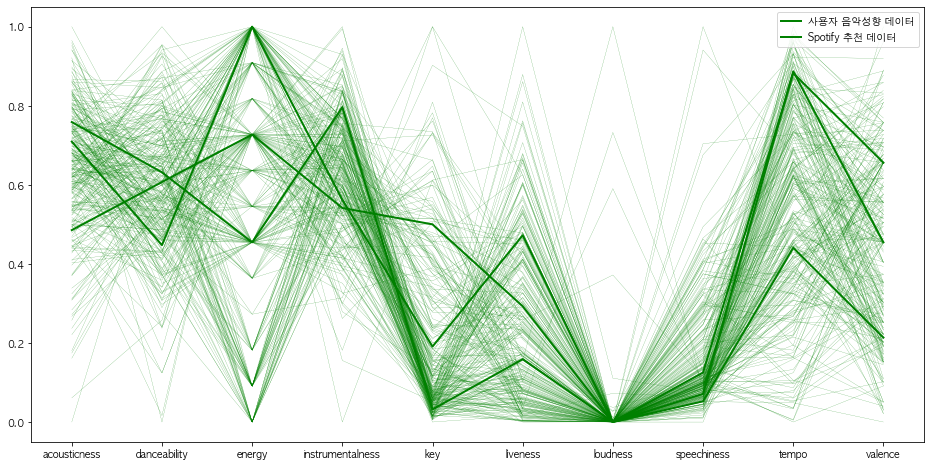

In [32]:
utils.visual_norm_data(sel_tracks, norm_features)

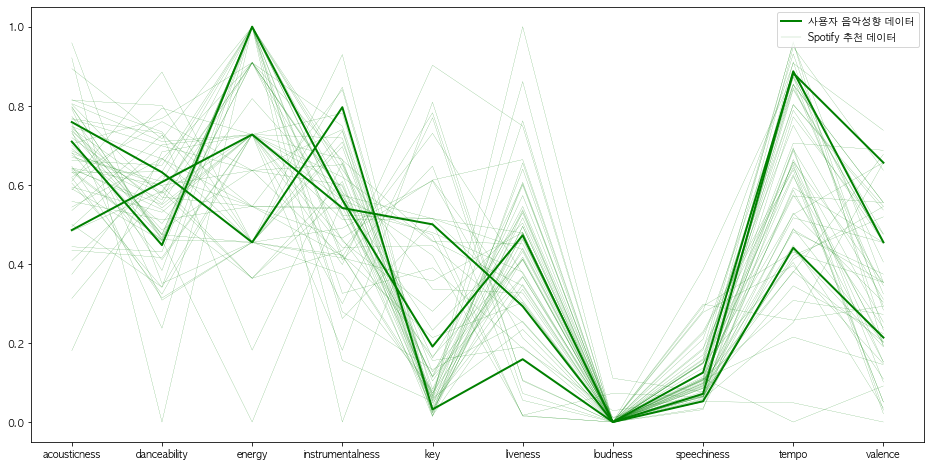

,id,name,artists,artists_name
1,1zIvvyjousJTxkumkCDnlo,BOLO,1MAUqH0haKBYbjpknTfreY,PENOMECO
2,1a1LrfgkTvfHFykIxcv8WU,Cherry Wine,73BLwSX6gsNeVzS7DgI4xe,grentperez
5,6nSHtgTH5a959xPucs6Ilb,HANGANG,7lXgbtBDcCRbfc5f8FhGUL,Hoody
6,08WPvDEsHvTFuB9w8tC2OS,Now and Later,6d47Z08T4snK50HgTEHo5Z,Sage The Gemini
7,2rbfCOgXMPoBLBrK2wLX5K,Chocolate,5TnQc2N1iKlFjYD7CPGvFc,DAY6


In [33]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

In [34]:
res = db.regist_mail(mail_box_id, recos[reco_musics])
mail_id = res.inserted_id
print("우체통({})에\n추천 플레이리스트 MuLetter({})가 등록되었습니다.".format(
    mail_box_id
    ,str(mail_id)))

우체통(623fd87941b77810641388aa)에
추천 플레이리스트 MuLetter(623fdd2241b77810641388ae)가 등록되었습니다.


In [35]:
genres

,artists,genres
0,0siBQaURCli5wn2lqv8WZg,"k-pop,pop"
1,2o8gT0fQmFxGNbowbdgeZe,"k-pop,hip-hop"
2,4XDi67ZENZcbfKnvMnTYsI,"k-pop,pop,hip-hop"


In [36]:
spotify.get_genres(token,recos[reco_musics])

,artists,genres
0,1MAUqH0haKBYbjpknTfreY,"k-pop,pop,hip-hop"
1,73BLwSX6gsNeVzS7DgI4xe,chill
2,7lXgbtBDcCRbfc5f8FhGUL,"chill,k-pop,pop"
3,6d47Z08T4snK50HgTEHo5Z,"pop,hip-hop"
4,5TnQc2N1iKlFjYD7CPGvFc,"k-pop,pop"
5,2vVT4qoxWje0gVD2FiWZ4u,"chill,pop"
6,2oX42qP5ineK3hrhBECLmj,"pop,rock,hip-hop"
7,1AhjOkOLkbHUfcHDSErXQs,"hip-hop,pop"
8,2kxP07DLgs4xlWz8YHlvfh,pop
9,7qKWQnE3S7v8m3rLwMVdGg,pop
